# Ookla Internet Connectivity Analysis

> The data used for this analysis includes:

1. **Ookla Data**  
   - **Source:** [Ookla Data](https://www.ookla.com/)  
   - **Description:** The Ookla Open Data provides high-resolution, crowd-sourced internet speed and latency measurements from mobile and fixed networks. It enables analysis of connectivity performance, coverage, and quality across regions, supporting data-driven assessments of digital infrastructure.  
   - **Temporal Coverage:** We use data from 2019 to 2025  

2. **WorldPop Data**  
   - **Source:** [WorldPop Population Data](https://www.worldpop.org/)  
   - **Description:** The WorldPop dataset provides high-resolution (100 m) gridded population estimates derived from census, survey, and satellite data. It offers spatially detailed insights into population distribution, enabling analysis of demographic patterns, accessibility, and development indicators.  
   - **Temporal Coverage:** We use data from 2019 to 2025


In [2]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

## Data Pre-processing

We apply several filtering and aggregation steps to extract mobile network performance metrics from Ookla Speedtest data for Algeria (2019–2025):

### Spatial Filtering

- **Quadkey Generation:** Generate zoom-10 parent tiles covering Algeria's extent, then expand to zoom-16 quadkeys (Ookla's native resolution ~610 m).  
  Tiles are filtered using polygon intersection rather than centroid-based methods to avoid border tile loss.

- **Geographic Filtering:** Retain only tiles whose polygons intersect Algeria's national boundary or fall within its bounding box.

### Aggregation

We aggregate download speed (Mbps), upload speed (Mbps), and latency (ms) across multiple administrative levels:

- **National:** Country-level quarterly means, medians, and test-weighted averages  
- **Subnational:** ADM1 (wilayas), ADM2 (districts), and ADM3 (communes) using spatial intersection  
- **Grid:** Zoom-12 (~2.4 km) and zoom-16 (~610 m) tiles for spatial mapping


# Annual Trends (Downlaod and Upload Speeds)

## Download Trends

In [3]:

import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

# Show Bokeh inline (run once per session)
output_notebook()

# Load and aggregate to YEAR
df = pd.read_csv("./processed_data/algeria_national_trends_mobile.csv").copy()
df['year'] = df['date'].str.slice(0, 4).astype(int)
yearly = (df.groupby('year', as_index=False)['avg_download_mbps']
            .mean().rename(columns={'avg_download_mbps':'download_mbps'}))
yearly = yearly.sort_values('year')

src = ColumnDataSource(yearly)

p = figure(title="Algeria – Yearly Download Speed (Mbps)",
           x_axis_type="linear", height=400, width=800,
           tools="pan,wheel_zoom,box_zoom,reset,save")

p.line('year', 'download_mbps', source=src, line_width=3)
p.circle('year', 'download_mbps', source=src, size=8)

p.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Download (Mbps)", "@download_mbps{0.00}")],
                      mode='vline'))
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Download (Mbps)"

show(p)



Loading BokehJS ...

## Upload Trends

In [4]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

df = pd.read_csv("processed_data/algeria_national_trends_mobile.csv").copy()
df['year'] = df['date'].str.slice(0, 4).astype(int)
yearly = (df.groupby('year', as_index=False)['avg_upload_mbps']
            .mean().rename(columns={'avg_upload_mbps':'upload_mbps'}))
yearly = yearly.sort_values('year')

src = ColumnDataSource(yearly)

p = figure(title="Algeria – Yearly Upload Speed (Mbps)",
           x_axis_type="linear", height=400, width=800,
           tools="pan,wheel_zoom,box_zoom,reset,save")

p.line('year', 'upload_mbps', source=src, line_width=3)
p.circle('year', 'upload_mbps', source=src, size=8)

p.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Upload (Mbps)", "@upload_mbps{0.00}")],
                      mode='vline'))
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Upload (Mbps)"

show(p)


Loading BokehJS ...

# Trends -  ADMN1

## Download -  ADMN1

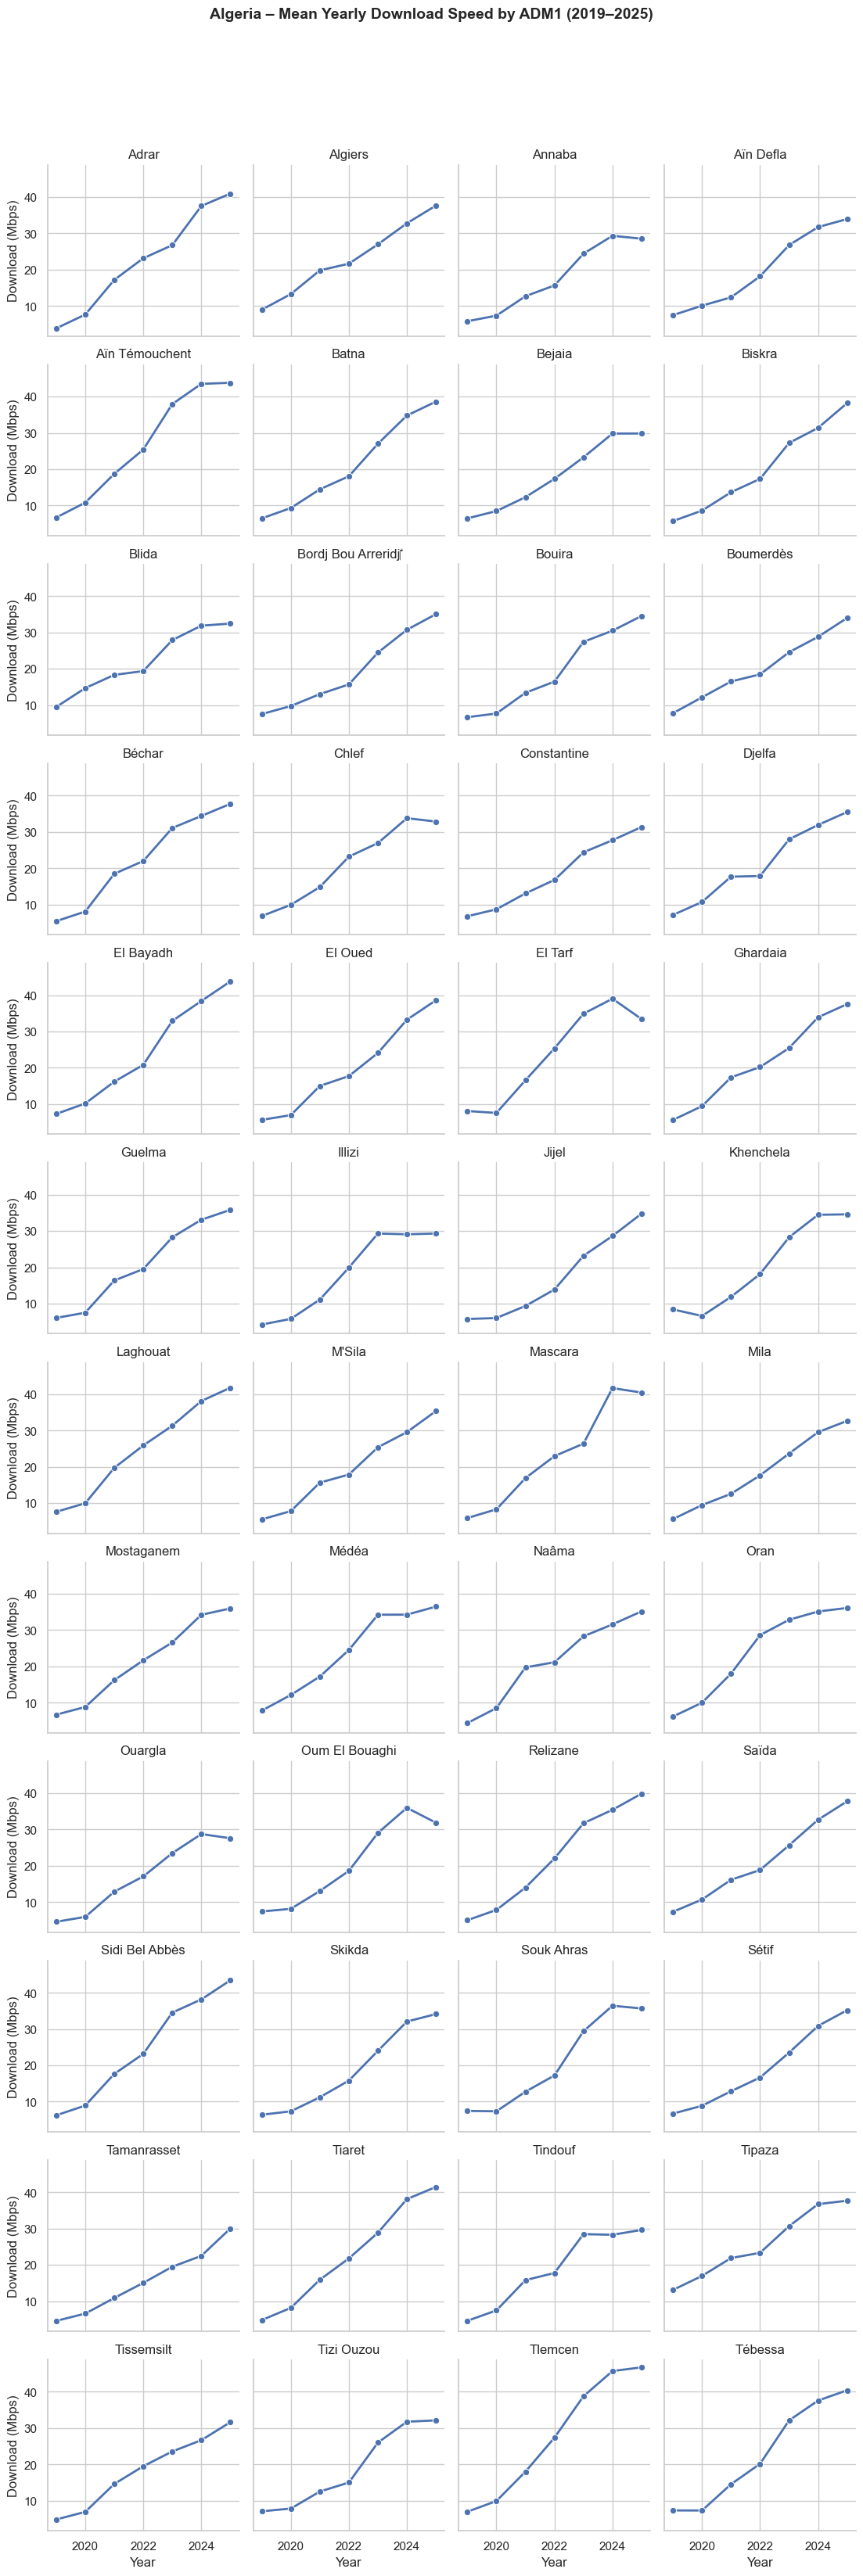

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load subnational data
df = pd.read_csv("processed_data/algeria_subnational_trends_mobile.csv")

# Keep ADM1 only and build yearly means
adm1 = df[df["admin_level"] == "ADM1"].copy()
adm1["year"] = adm1["date"].str.slice(0, 4).astype(int)
yearly = (adm1.groupby(["admin_name", "year"], as_index=False)["avg_download_mbps"]
               .mean()
               .rename(columns={"avg_download_mbps": "download_mbps"}))

# Faceted line charts
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(yearly.sort_values("admin_name"),
                  col="admin_name", col_wrap=4, height=2.8, sharey=True)
g.map_dataframe(sns.lineplot, x="year", y="download_mbps", marker="o", linewidth=2)
g.set_axis_labels("Year", "Download (Mbps)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Algeria – Mean Yearly Download Speed by ADM1 (2019–2025)", fontsize=14, weight="bold")
plt.show()


## Upload -  ADMN1

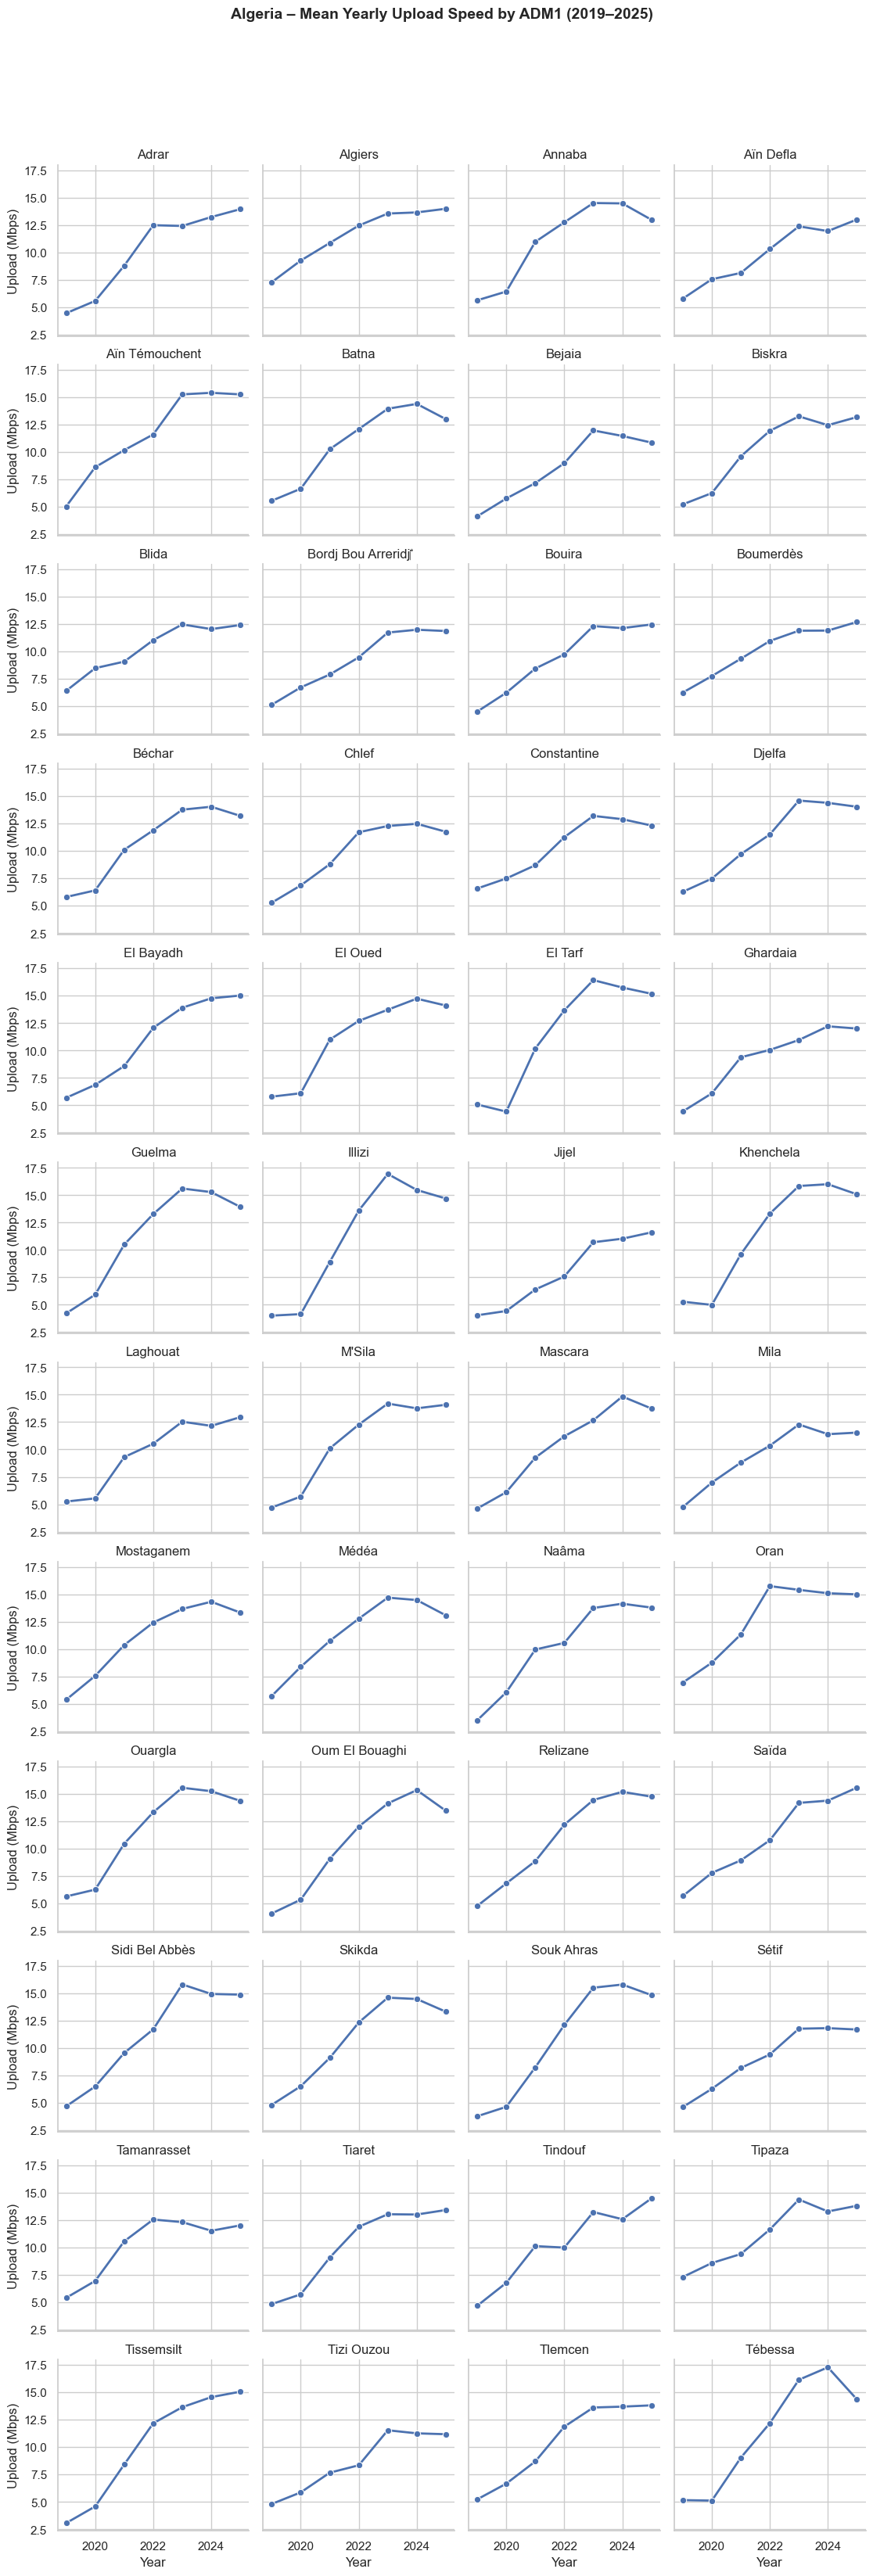

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load subnational data
df = pd.read_csv("processed_data/algeria_subnational_trends_mobile.csv")

# Keep ADM1 only and build yearly means
adm1 = df[df["admin_level"] == "ADM1"].copy()
adm1["year"] = adm1["date"].str.slice(0, 4).astype(int)
yearly = (adm1.groupby(["admin_name", "year"], as_index=False)["avg_upload_mbps"]
               .mean()
               .rename(columns={"avg_upload_mbps": "upload_mbps"}))

# Faceted line charts
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(yearly.sort_values("admin_name"),
                  col="admin_name", col_wrap=4, height=2.8, sharey=True)
g.map_dataframe(sns.lineplot, x="year", y="upload_mbps", marker="o", linewidth=2)
g.set_axis_labels("Year", "Upload (Mbps)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Algeria – Mean Yearly Upload Speed by ADM1 (2019–2025)", fontsize=14, weight="bold")
plt.show()


# Trends -  ADMN3

In [8]:
import pandas as pd

from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, Select, CustomJS
from bokeh.plotting import figure
from bokeh.layouts import column

output_notebook()

# Read with a Unicode-friendly codec
df = pd.read_csv("processed_data/algeria_subnational_trends_mobile.csv", encoding="utf-8-sig")

# Filter ADM3 and build year correctly
adm3 = df[df["admin_level"] == "ADM3"].copy()
adm3["year"] = adm3["date"].astype(str).str.slice(0, 4).astype(int)

# Clean and filter commune names
adm3["admin_name"] = adm3["admin_name"].astype(str).str.strip()
valid_names = (
    adm3["admin_name"].notna()
    & (adm3["admin_name"] != "")
    & ~adm3["admin_name"].str.contains(r"\?")
    & adm3["admin_name"].str.match(r"^[A-Za-zÀ-ÿ'\-\s]+$")
)
adm3 = adm3[valid_names]

# Yearly mean per commune
yearly = (
    adm3.groupby(["admin_name", "year"], as_index=False)
        .agg(
            download=("avg_download_mbps", "mean"),
            upload=("avg_upload_mbps", "mean")
        )
)

# Build clean option list
wilayas = sorted(yearly["admin_name"].unique().tolist())
default_w = wilayas[0]

# JS-serialisable map: commune -> arrays
data_map = {
    w: {
        "year": yearly.loc[yearly.admin_name.eq(w), "year"].tolist(),
        "download": yearly.loc[yearly.admin_name.eq(w), "download"].tolist(),
        "upload": yearly.loc[yearly.admin_name.eq(w), "upload"].tolist(),
    }
    for w in wilayas
}

src = ColumnDataSource(data=data_map[default_w])

p = figure(
    height=420,
    width=820,
    title=f"Yearly Speed – {default_w}",
    x_axis_label="Year",
    y_axis_label="Mbps",
    tools="pan,wheel_zoom,box_zoom,reset,save,hover",
    toolbar_location="right"
)

p.line("year", "download", source=src, line_width=3, legend_label="Download", line_color="steelblue")
p.scatter("year", "download", source=src, size=7, color="steelblue")
p.line("year", "upload",   source=src, line_width=3, legend_label="Upload",   line_color="orange")
p.scatter("year", "upload", source=src, size=7, color="orange")

p.legend.click_policy = "hide"
p.select_one(HoverTool).tooltips = [
    ("Year", "@year"),
    ("Download", "@download{0.00}"),
    ("Upload", "@upload{0.00}")
]

selector = Select(title="Commune (ADM3):", value=default_w, options=wilayas)

selector.js_on_change(
    "value",
    CustomJS(args=dict(src=src, dataMap=data_map, fig=p), code="""
        const w = cb_obj.value;
        const d = dataMap[w];
        src.data = {year: d.year, download: d.download, upload: d.upload};
        src.change.emit();
        fig.title.text = `Yearly Speed – ${w}`;
    """)
)

show(column(selector, p))


Loading BokehJS ...

The figures below show maps at admin level 3 between 2019 and 2025. You can filter to view trends in download, upload and latency.


In [ ]:

import json
import numpy as np
import pandas as pd
import geopandas as gpd
from bokeh.models import HoverTool
from bokeh.io import output_notebook, show
from bokeh.models import (
    GeoJSONDataSource, LinearColorMapper, ColorBar, FixedTicker,
    Select, CustomJS
)
from bokeh.plotting import figure
from bokeh.layouts import gridplot, column
from bokeh.palettes import brewer

ADM3_GEO = "./boundaries/geoBoundaries-DZA-ADM3.geojson"                  
SUBNAT_CSV = "./processed_data/algeria_subnational_trends_mobile.csv" 
YEARS = list(range(2019, 2025 + 1))
METRIC_COLUMNS = {
    "Download (Mbps)": "avg_download_mbps",
    "Upload (Mbps)":   "avg_upload_mbps",
    "Latency (ms)":    "avg_latency_ms",   # Added if present
}
INITIAL_METRIC = "Download (Mbps)"  # Default
output_notebook()

# -------------------- LOAD DATA --------------------
# ADM3 geometry
g_adm3 = gpd.read_file(ADM3_GEO)[["shapeName", "geometry"]] \
           .rename(columns={"shapeName":"admin_name"}).to_crs(4326)

# Subnational metrics
df = pd.read_csv(SUBNAT_CSV, encoding="utf-8")
df = df[df["admin_level"] == "ADM3"].copy()

# Add year column if needed
if "year" not in df.columns and "date" in df.columns:
    df["year"] = df["date"].astype(str).str[:4].astype(int)

# Filter year range
df = df[df["year"].between(min(YEARS), max(YEARS))]

# Keep only metrics present
metric_labels = [lab for lab, col in METRIC_COLUMNS.items() if col in df.columns]
if INITIAL_METRIC not in metric_labels:
    INITIAL_METRIC = metric_labels[0]

# Yearly median per ADM3
def yearly_metric(metric_col: str) -> pd.DataFrame:
    return (df.groupby(["admin_name", "year"], as_index=False)
              .agg({metric_col: "median"})
              .rename(columns={metric_col: metric_col}))

# Build GeoDataFrames per year with all available metrics
year_gdfs = {}
for y in YEARS:
    g = g_adm3.copy()
    for lab, col in METRIC_COLUMNS.items():
        if col in df.columns:
            ym = yearly_metric(col)
            g = g.merge(ym[ym["year"] == y][["admin_name", col]], on="admin_name", how="left")
    year_gdfs[y] = g

# Robust colour scales per metric
metric_ranges = {}
for lab, col in METRIC_COLUMNS.items():
    if col not in df.columns:
        continue
    vals = []
    for y in YEARS:
        if col in year_gdfs[y].columns:
            vals.append(year_gdfs[y][col].to_numpy())
    vals = np.concatenate([v[~np.isnan(v)] for v in vals if v is not None]) if vals else np.array([])
    if vals.size == 0:
        metric_ranges[lab] = (0.0, 1.0)
    else:
        vmin = float(np.nanpercentile(vals, 5))
        vmax = float(np.nanpercentile(vals, 95))
        if vmin == vmax:
            vmax = vmin + 1.0
        metric_ranges[lab] = (vmin, vmax)

# -------------------- BUILD BOKEH FIGURES --------------------
palette = brewer["YlGnBu"][8][::-1]  # blue palette reversed
initial_col = METRIC_COLUMNS[INITIAL_METRIC]
vmin, vmax = metric_ranges[INITIAL_METRIC]

# Create GeoJSONDataSource per year
sources = {}
for y in YEARS:
    g = year_gdfs[y].copy()
    if initial_col not in g.columns:
        g[initial_col] = np.nan
    g["value"] = g[initial_col]
    gj = json.loads(g.to_json())
    sources[y] = GeoJSONDataSource(geojson=json.dumps(gj))

# Shared mapper
mapper = LinearColorMapper(palette=palette, low=vmin, high=vmax, nan_color="#f0f0f0")

TOOLS = "pan,wheel_zoom,reset,hover"
figs = []

for y in YEARS:
    p = figure(
        title=str(y), width=320, height=260,
        match_aspect=True, tools=TOOLS, active_scroll="wheel_zoom"
    )
    p.grid.visible = False
    p.axis.visible = False

    p.patches(
        xs="xs", ys="ys",
        source=sources[y],
        fill_color={"field": "value", "transform": mapper},
        line_color="white", line_width=0.5
    )

    hov = p.select_one(HoverTool)
    hov.tooltips = [
        ("Commune", "@admin_name"),
        *([(lab, f"@{METRIC_COLUMNS[lab]}{{0.2f}}") for lab in metric_labels])
    ]
    figs.append(p)

# Add a shared colorbar
ticks = np.linspace(vmin, vmax, 6)
color_bar = ColorBar(color_mapper=mapper, ticker=FixedTicker(ticks=list(ticks)),
                     label_standoff=8, location=(0, 0), title=INITIAL_METRIC)
figs[-1].add_layout(color_bar, "right")

# Arrange grid 4 columns
grid = gridplot(figs, ncols=4, merge_tools=False)

# -------------------- METRIC DROPDOWN --------------------
metric_select = Select(title="Metric", value=INITIAL_METRIC, options=metric_labels)
metric_ranges_dict = {lab: list(metric_ranges[lab]) for lab in metric_ranges}

callback = CustomJS(
    args=dict(
        sources=list(sources.values()),
        mapper=mapper,
        cbar=color_bar,
        metric_select=metric_select,
        ranges=metric_ranges_dict,
        col_map=METRIC_COLUMNS
    ),
    code="""
    const label = metric_select.value;
    const col = col_map[label];
    const [lo, hi] = ranges[label];

    mapper.low = lo;
    mapper.high = hi;
    cbar.title = label;

    for (let i = 0; i < sources.length; i++) {
      const src = sources[i];
      const gj = JSON.parse(src.geojson);
      for (let f of gj.features) {
        const props = f.properties || {};
        const v = (props.hasOwnProperty(col) && props[col] != null) ? Number(props[col]) : NaN;
        props["value"] = v;
        f.properties = props;
      }
      src.geojson = JSON.stringify(gj);
    }
    """
)
metric_select.js_on_change("value", callback)

# -------------------- SHOW --------------------
show(column(metric_select, grid))


Loading BokehJS ...

In [ ]:

import os, re, glob
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt

GRID_GPKG   = "./processed_data/algeria_grid_z12.gpkg"         
GRID_LONG   = "./processed_data/algeria_grid_data_long.csv"    
WORLDPOP_DIR = "worldpop_tifs/"  

YEARS = list(range(2019, 2026))  

g_tiles = gpd.read_file(GRID_GPKG).to_crs(4326)
# normalise key name
if "quadkey_z12" not in g_tiles.columns:
    g_tiles["quadkey_z12"] = g_tiles["quadkey"].astype(str)

df_long = pd.read_csv(GRID_LONG, encoding="utf-8")
# keep only needed columns + ensure types
df_long["quadkey_z12"] = df_long["quadkey_z12"].astype(str)
if "year" not in df_long.columns and "date" in df_long.columns:
    df_long["year"] = df_long["date"].astype(str).str[:4].astype(int)

df_long = df_long[df_long["year"].between(min(YEARS), max(YEARS))]

# Yearly mean per tile
tile_year = (df_long.groupby(["quadkey_z12","year"], as_index=False)
             .agg(download=("avg_download_mbps","mean"),
                  upload=("avg_upload_mbps","mean")))

tifs = sorted(glob.glob(os.path.join(WORLDPOP_DIR, "*.tif")))
def infer_year(path):
    m = re.search(r"(20\d{2})", os.path.basename(path))
    return int(m.group(1)) if m else None

year_to_tif = {infer_year(fp): fp for fp in tifs if infer_year(fp) in YEARS}

pop_rows = []

for y in YEARS:
    tif = year_to_tif.get(y)
    if tif is None:
        continue

    with rasterio.open(tif) as src:
        tiles = g_tiles.to_crs(src.crs)
        zs = zonal_stats(
            tiles["geometry"],
            tif,
            stats=["sum"],
            nodata=src.nodata if src.nodata is not None else 0,
            all_touched=True,
            raster_out=False
        )
        pop = np.array([d["sum"] if d["sum"] is not None else 0.0 for d in zs], dtype=float)

    tmp = pd.DataFrame({
        "quadkey_z12": tiles["quadkey_z12"].astype(str).values,
        "year": y,
        "pop": pop
    })
    pop_rows.append(tmp)

pop_by_tile_year = pd.concat(pop_rows, ignore_index=True) if pop_rows else pd.DataFrame(columns=["quadkey_z12","year","pop"])

df_m = (tile_year.merge(pop_by_tile_year, on=["quadkey_z12","year"], how="left")
                 .fillna({"pop": 0.0}))

def weighted_average(group, col, wcol="pop"):
    w = group[wcol].clip(lower=0)
    v = group[col]
    s = (v * w).sum()
    d = w.sum()
    return np.nan if d == 0 else s / d

nat = (df_m.groupby("year")
          .apply(lambda g: pd.Series({
              "pw_download_mbps": weighted_average(g, "download"),
              "pw_upload_mbps":   weighted_average(g, "upload")
          }))
          .reset_index())

plt.figure(figsize=(9,5))
plt.plot(nat["year"], nat["pw_download_mbps"], marker="o", label="Download (pop-weighted)")
plt.plot(nat["year"], nat["pw_upload_mbps"], marker="o", label="Upload (pop-weighted)")
plt.xticks(YEARS, rotation=0)
plt.xlabel("Year")
plt.ylabel("Mbps")
plt.title("Algeria • Population-weighted Internet Speeds (ADM3 tiles → national), 2019–2025")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("algeria_pop_weighted_speeds_2019_2025.png", dpi=200, bbox_inches="tight")
plt.show()

nat.to_csv("processed_data/algeria_pop_weighted_trends_2019_2025.csv", index=False, encoding="utf-8")
